In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dimensionality Reduction

In [2]:
import pandas as pd

df = pd.DataFrame([['NO', 'NO', 'NO', 'YES', 'Benign'],
                   ['NO', 'NO', 'NO', 'NO', 'Benign'],
                   ['YES', 'NO', 'YES', 'NO', 'Spam'],
                   ['NO', 'YES', 'YES', 'YES', 'Spam'],
                   ['YES', 'NO', 'NO', 'YES', 'Benign'],
                   ['YES', 'YES', 'YES', 'YES', 'Spam']
                  ],
                  columns = ['ContainsSpellingMistakes', 'ContainsUrgent', 'ContainsASAP',  'ContainsLink', 'Label']
                 )
df

,ContainsSpellingMistakes,ContainsUrgent,ContainsASAP,ContainsLink,Label
0,NO,NO,NO,YES,Benign
1,NO,NO,NO,NO,Benign
2,YES,NO,YES,NO,Spam
3,NO,YES,YES,YES,Spam
4,YES,NO,NO,YES,Benign
5,YES,YES,YES,YES,Spam


In [3]:
X = df.drop('Label', axis = 1, inplace = False)
y = df['Label']

print(X, '\n\n', y)

  ContainsSpellingMistakes ContainsUrgent ContainsASAP ContainsLink
0                       NO             NO           NO          YES
1                       NO             NO           NO           NO
2                      YES             NO          YES           NO
3                       NO            YES          YES          YES
4                      YES             NO           NO          YES
5                      YES            YES          YES          YES 

 0    Benign
1    Benign
2      Spam
3      Spam
4    Benign
5      Spam
Name: Label, dtype: object


In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert all data to numbers
leX = LabelEncoder()
XL = X.apply(leX.fit_transform)

leY = LabelEncoder()
yL = leY.fit_transform(y)

print(XL, '\n\n', yL)

   ContainsSpellingMistakes  ContainsUrgent  ContainsASAP  ContainsLink
0                         0               0             0             1
1                         0               0             0             0
2                         1               0             1             0
3                         0               1             1             1
4                         1               0             0             1
5                         1               1             1             1 

 [0 0 1 1 0 1]


In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(XL)
X = pca.transform(XL)
X = pd.DataFrame(X, columns = ['Feature1', 'Feature2'])
X

,Feature1,Feature2
0,-0.569933,-0.580462
1,-0.882814,-0.010497
2,0.042248,0.973800
3,0.715967,-0.614335
4,-0.295684,0.132684
5,0.990216,0.098810


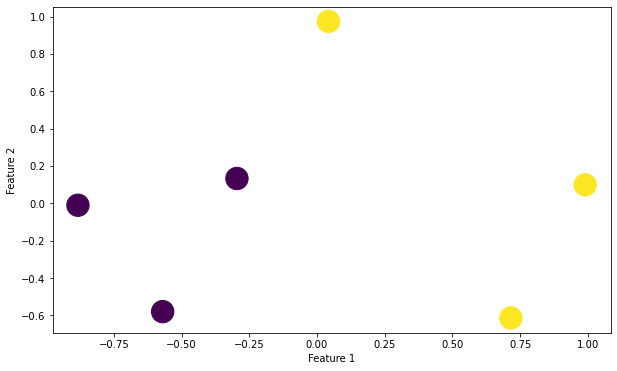

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(X.Feature1, X.Feature2, marker = 'o', s = 500, c = yL)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()